# Task1
### Decision Tree
#### Titanic data set

In [1]:
# importing libraries
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#reading the csv
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### We have to clean the data now. We will drop the useless columns and fill the NA values in others

In [4]:
#complete missing age with median
titanic['Age'].fillna(titanic['Age'].median(), inplace = True)

#complete embarked with mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace = True)

#complete missing fare with median
titanic['Fare'].fillna(titanic['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others useles features.
drop_column = ['PassengerId','Cabin', 'Ticket']
titanic.drop(drop_column, axis=1, inplace = True)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


### Now we will do some simple feature engineering. 

In [6]:
titanic['FamilySize'] = titanic ['SibSp'] + titanic['Parch'] + 1
titanic['IsAlone'] = 1 #initialize to yes/1 is alone
titanic['IsAlone'].loc[titanic['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1
#quick code split title from name
titanic['title'] = titanic['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
titanic['title'] = titanic['title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')
# Now we can drop the Name column
titanic.drop('Name', axis=1, inplace = True)

In [7]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,title
0,0,3,male,22.0,1,0,7.2500,S,2,0,Mr
1,1,1,female,38.0,1,0,71.2833,C,2,0,Mrs
2,1,3,female,26.0,0,0,7.9250,S,1,1,Miss
3,1,1,female,35.0,1,0,53.1000,S,2,0,Mrs
4,0,3,male,35.0,0,0,8.0500,S,1,1,Mr


### Now we should encode our categorical columns

In [8]:
titanic['title'] = titanic['title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}).fillna(0)
titanic['Sex'] = titanic['Sex'].map({'male': 1, 'female': 0})
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [9]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,title
0,0,3,1,22.0,1,0,7.2500,0,2,0,1.0
1,1,1,0,38.0,1,0,71.2833,1,2,0,3.0
2,1,3,0,26.0,0,0,7.9250,0,1,1,2.0
3,1,1,0,35.0,1,0,53.1000,0,2,0,3.0
4,0,3,1,35.0,0,0,8.0500,0,1,1,1.0


### Now we can switch to model training

In [10]:
#Spliting the data 
X_train, X_tets, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), titanic['Survived'], test_size=0.4,random_state=41)

In [11]:
#Initializing our tree with deafult parameters
model = DecisionTreeClassifier(random_state=42)

In [12]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [13]:
#Getting a prediction
prediction_on_test = model.predict(X_tets)
prediction_on_train = model.predict(X_train)

In [14]:
#Getting accuracy
print('accuracy on test: ',accuracy_score(y_test,prediction_on_test))
print('accuracy on train: ',accuracy_score(y_train,prediction_on_train))

accuracy on test:  0.7703081232492998
accuracy on train:  0.9812734082397003


In [15]:
# Plot the accuracies versus the depth of the tree.
max_depth= range(1,20)
scores_on_test = []
scores_on_train = []
for m in max_depth:
    tree = DecisionTreeClassifier(max_depth=m,random_state=42)
    
    tree.fit(X_train,y_train)
    #Getting a prediction
    prediction_on_test = tree.predict(X_tets)
    prediction_on_train = tree.predict(X_train)
    scores_on_test.append(accuracy_score(y_test,prediction_on_test))
    scores_on_train.append(accuracy_score(y_train,prediction_on_train))

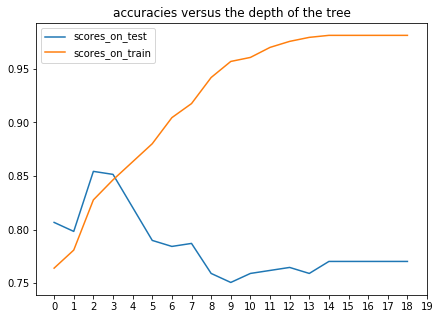

In [16]:
#Plotting
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
ax.plot(scores_on_test,label='scores_on_test')
ax.plot(scores_on_train,label='scores_on_train')
ax.set_xticks(list(range(20)))
plt.title('accuracies versus the depth of the tree')
ax.legend()
plt.show()

### Looking at the graph we can clearly see that the optimum value of depth for our task is 2. 
Also, we can see that when we have maxdepth of 8, accuracy on the test set is much below 80% but on the train set it is above 95%. 
It is a classical example of overfitting.
If we start tunning our model's parameters using only test set, we are risking to overfit to that set too.
To combat that we should use as much testing data as possible. There is a method called k-fold cross-validation just for that.

In k-fold cross-validation, the model is trained $K$ times on different ($K-1$) subsets of the original dataset (in white) and checked on the remaining subset (each time a different one, shown above in orange).
We obtain $K$ model quality assessments that are usually averaged to give an overall average quality of classification/regression.

Cross-validation provides a better assessment of the model quality on new data compared to the hold-out set approach. However, cross-validation is computationally expensive when you have a lot of data.
 
Cross-validation is a very important technique in machine learning and can also be applied in statistics and econometrics. It helps with hyperparameter tuning, model comparison, feature evaluation, etc.

In [17]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= 'https://habrastorage.org/webt/80/nx/1p/80nx1pa4iet33x9pw-bj02khyhs.png')

### Now we can actually perform cross-validation.

In [18]:
model = DecisionTreeClassifier(max_depth=2)
mean_fold_score=cross_val_score(model,titanic.drop('Survived',axis=1), titanic['Survived'] ,cv = 5, scoring = "accuracy")
print('cross-validated accuracy: ',np.mean(mean_fold_score))

cross-validated accuracy:  0.7811813445483647


### It is obvious that this result is much more trustful, thus we will do our accuracies versus the depth of the tree graph again

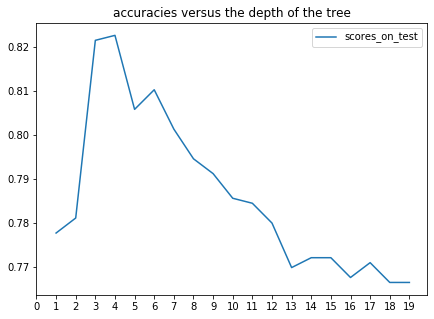

In [19]:
# Plot the accuracies versus the depth of the tree.
max_depth= range(20)
cv_scores = [ ]
for m in max_depth:
    tree = DecisionTreeClassifier(max_depth=m,random_state=42)
    scores = cross_val_score(tree,titanic.drop('Survived',axis=1), titanic['Survived'] ,cv = 5, scoring = "accuracy")
    cv_scores.append(scores.mean())
#Plotting
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
ax.plot(cv_scores,label='scores_on_test')
ax.set_xticks(list(range(20)))
plt.title('accuracies versus the depth of the tree')
ax.legend()
plt.show()

### After cross-validation we can see that actually, the best depth of the tree is 4

In [20]:
model = DecisionTreeClassifier(max_depth=4)
mean_fold_score=cross_val_score(model,titanic.drop('Survived',axis=1), titanic['Survived'] ,cv = 5, scoring = "accuracy")
print('cross-validated accuracy: ',np.mean(mean_fold_score))

cross-validated accuracy:  0.8226539451384094


# Task2
### Support Vector Machine
#### Wisconsin Breast Cancer data set

In [21]:
#reading the csv
BreastCancer = pd.read_csv('data/breastcancerwisconsin.txt',names=['id','Clump Thickness','Uniformity of Cell Size',
                                                              'Uniformity of Cell Shape','Marginal Adhesion',
                                                              'Single Epithelial Cell Size','Bare Nuclei',
                                                              'Bland Chromatin','Normal Nucleoli', 'Mitoses', 'Class'])
BreastCancer=BreastCancer.replace('?',np.nan)
BreastCancer.drop('id',axis=1,inplace=True)
BreastCancer.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [22]:
# We have 16 missing values in Bare Nuclei column
BreastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  683 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [23]:
BreastCancer['Bare Nuclei'].fillna(BreastCancer['Bare Nuclei'].mode()[0], inplace = True)
BreastCancer['Bare Nuclei']=BreastCancer['Bare Nuclei'].astype('int64')

In [24]:
#Now everything is ok
BreastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int64
 6   Bland Chromatin              699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [25]:
#lets encode our target deature in a more standart way
BreastCancer['Class'] = BreastCancer['Class'].map({2: 0, 4: 1})
BreastCancer['Class'].value_counts()

0    458
1    241
Name: Class, dtype: int64

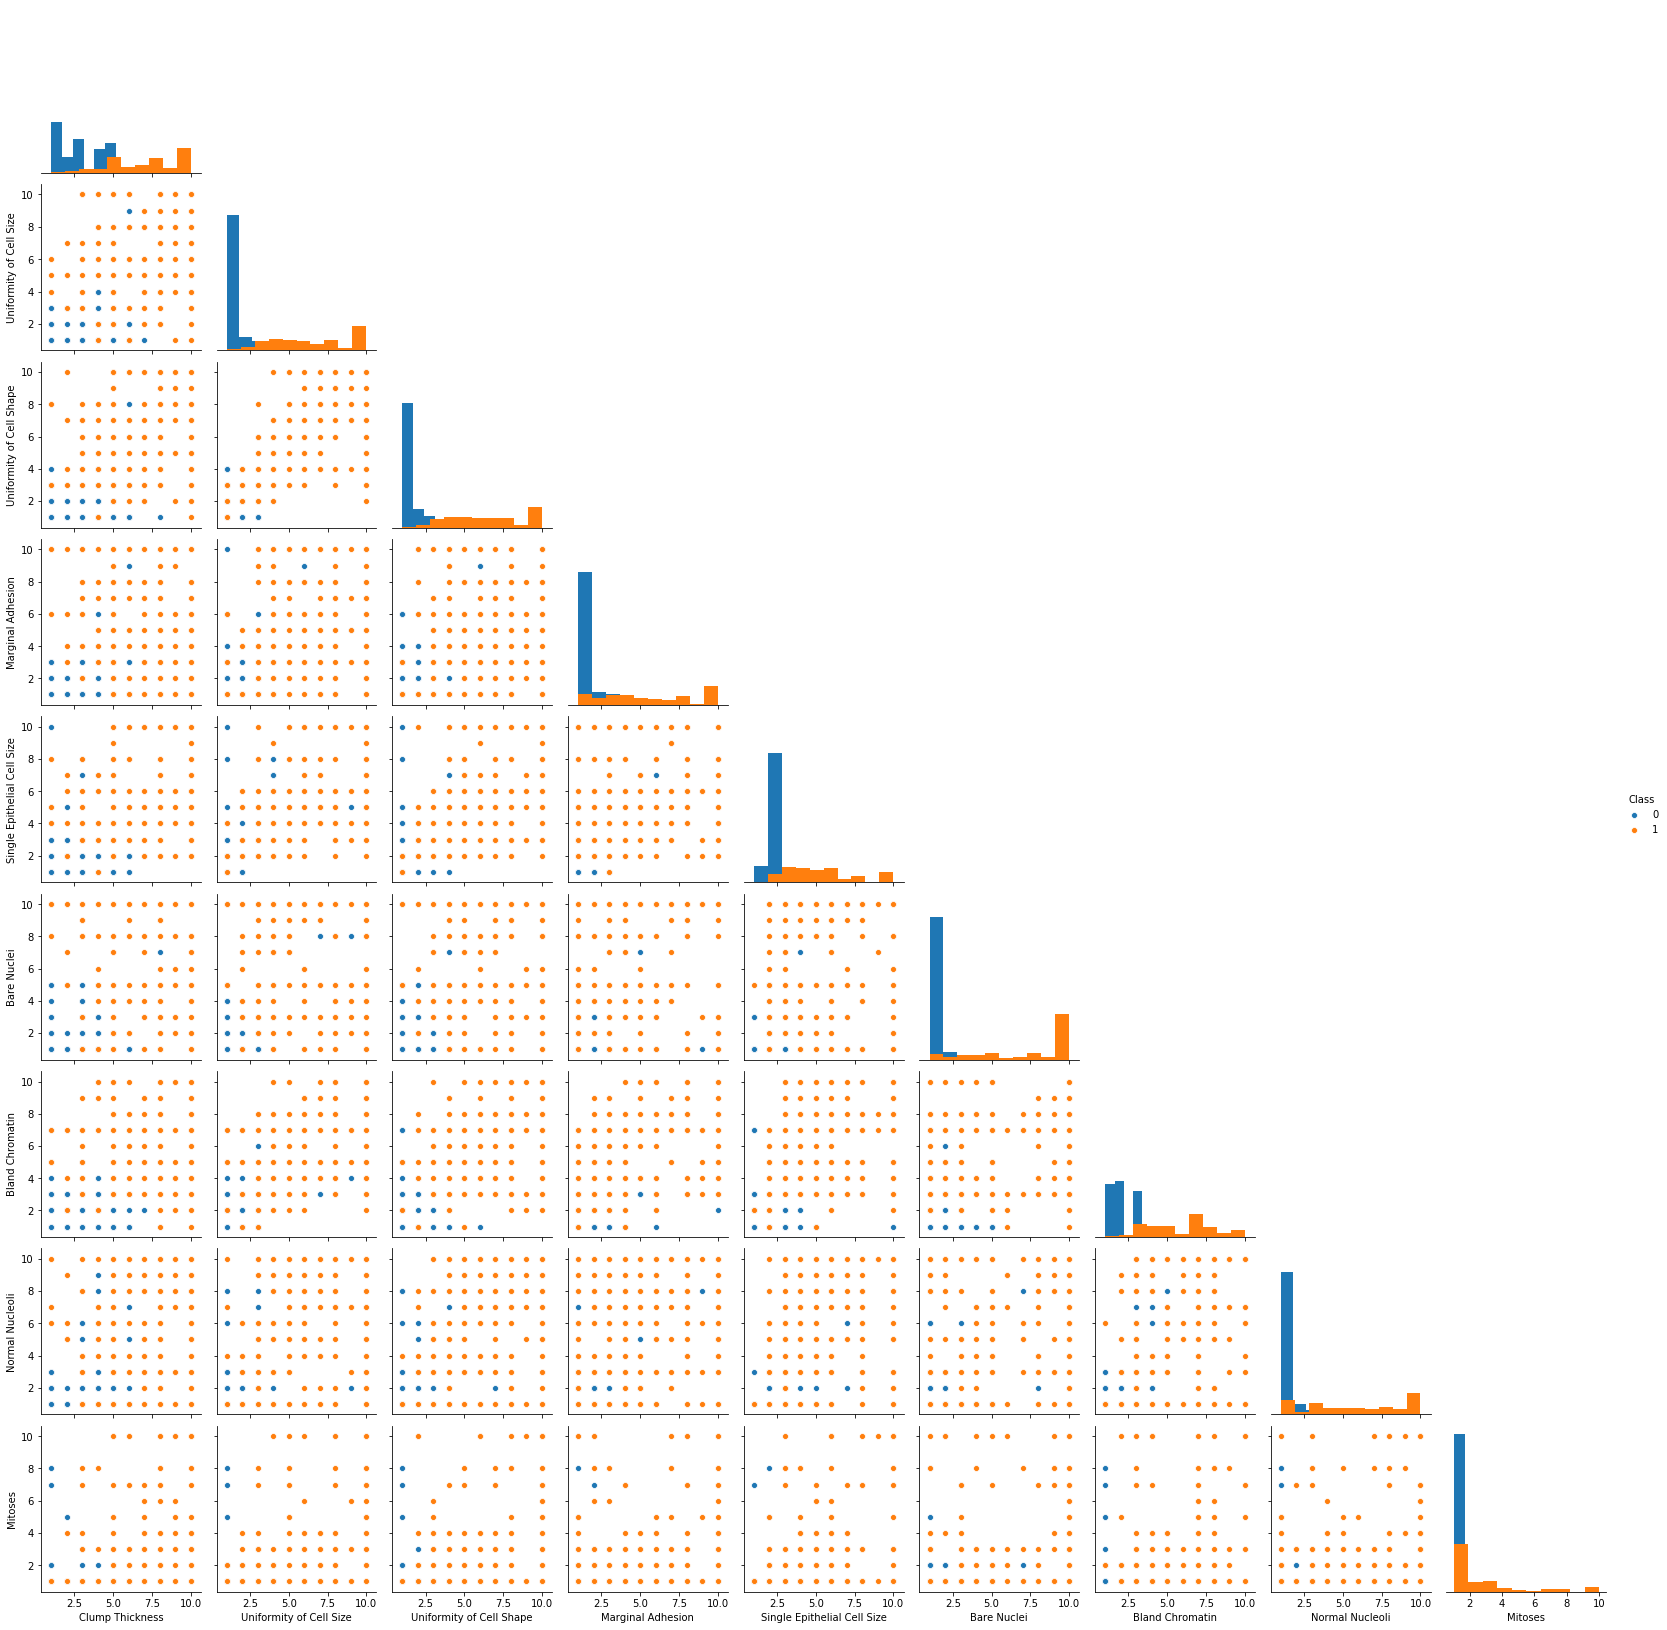

In [26]:
# performing data visualization with scatter plots
sns.pairplot(BreastCancer,corner=True,diag_kind='hist',hue = 'Class')

In [27]:
#Splitiing the data
X_train, X_tets, y_train, y_test = train_test_split(BreastCancer.drop('Class',axis=1), BreastCancer['Class'], test_size=0.4,random_state=41)

In [28]:
#Lets Train our model
model = SVC()
model.fit(X_train,y_train)
prediction_on_test = model.predict(X_tets)
prediction_on_train = model.predict(X_train)
print('accurasy on test: ',accuracy_score(y_test,prediction_on_test))
print('accurasy on train: ',accuracy_score(y_train,prediction_on_train))

accurasy on test:  0.9714285714285714
accurasy on train:  0.9785202863961814


### We can see that our model performs really well (accuracy 97%+) even with the default parameters

### Let's check it using cross-validation now

In [29]:
model =SVC()
mean_fold_score=cross_val_score(model,BreastCancer.drop('Class',axis=1), BreastCancer['Class'],cv = 5, scoring = "accuracy")
print('cross-validated accuracy: ',np.mean(mean_fold_score))

cross-validated accuracy:  0.9614080164439877


### Now we can plot the decision region of the classifier

In [30]:
# Now we will reduce dimentionality into two-dimensional feature space using PCA. By reducing from 11 into 2 dimensions we lost only 36% of varience
pca = PCA(0.76)
y_reduced=BreastCancer['Class']
X_reduced = pca.fit_transform(BreastCancer.drop('Class',axis=1))

In [31]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [32]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

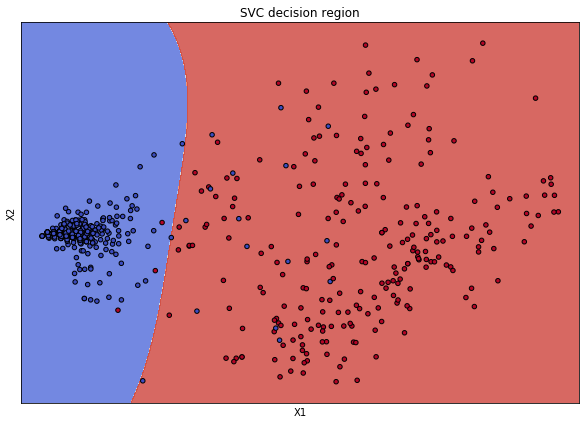

number of support vectors to each class [30 35]


In [33]:
model = SVC()
model.fit(X_reduced,y_reduced)
plt.figure(figsize=(10,7))
ax = plt.subplot(111)
X0, X1 = X_reduced[:, 0], X_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=BreastCancer['Class'], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVC decision region')
plt.show()
print('number of support vectors to each class', model.n_support_)